# Airline Passenger Satisfaction Analysis

## Table of Contents
1. [Project Overview](#project-overview)
2. [Data Preprocessing](#data-preprocessing)
3. [Exploratory Data Analysis](#exploratory-data-analysis)
4. [Feature Engineering](#feature-engineering)
5. [Model Training](#model-training)
6. [Model Evaluation](#model-evaluation)
7. [Conclusion](#conclusion)

## Project Overview
This project analyzes airline passenger satisfaction using machine learning techniques. The goal is to predict passenger satisfaction based on various flight and service-related features.

## Data Exploration

### Data Loading and Initial Exploration

In [2]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('data/train.csv')

#### Initial Data Exploration

In [4]:
df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [5]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [7]:
df.shape

(103904, 25)

## Data Preprocessing

### Handling Missing Values

In [8]:
missing_values = df.isnull().sum()
missing_values

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

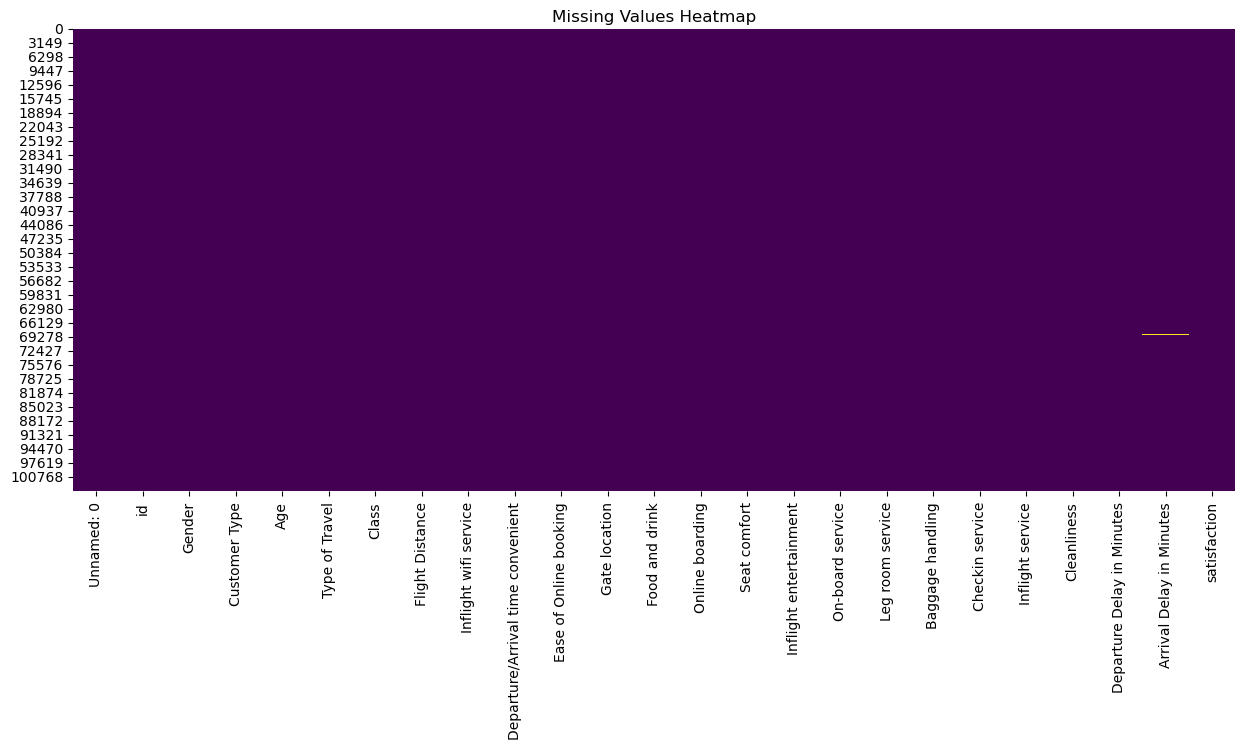

In [10]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [11]:
# Missing values percentage
percentage = missing_values / df.shape[0] * 100
percentage

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

So, only 0.2983 percent of the entire column is missing. Therefore we can easily drop them for convenience. Also `Unnamed: 0` and `id` columns doesn't add any values to the problem, so we'll drop them too.

In [12]:
df = df.dropna()
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

### Feature Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

cat_cols = ['Type of Travel', 'Customer Type', 'Class', 'satisfaction']
oh_col = ['Gender']

encoding_dict = {}
le = LabelEncoder()
oh = OneHotEncoder(sparse_output=False, drop='first')

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))
    encoding_dict[col] = dict(zip(le.classes_, range(len(le.classes_))))

encoded_data = oh.fit_transform(df[oh_col])
encoded_df = pd.DataFrame(encoded_data, columns=oh.get_feature_names_out(oh_col))

df = df.drop(columns=oh_col).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)

print("\nEncoding Mappings:")
for col, mapping in encoding_dict.items():
    print(f"{col}: {mapping}")

df.head()



Encoding Mappings:
Type of Travel: {'Business travel': 0, 'Personal Travel': 1}
Customer Type: {'Loyal Customer': 0, 'disloyal Customer': 1}
Class: {'Business': 0, 'Eco': 1, 'Eco Plus': 2}
satisfaction: {'neutral or dissatisfied': 0, 'satisfied': 1}


Customer Type  Age  Type of Travel  Class  Flight Distance  \
0              0   13               1      2              460   
1              1   25               0      0              235   
2              0   26               0      0             1142   
3              0   25               0      0              562   
4              0   61               0      0              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  ...  \
0                       3              1               5  ...   
1                       3              3               1  ...   
2                       2              2               5  ...   
3                       5              5               2  ...   
4                       3              3               4  ...   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes  satisfaction  Gender_Male  
0                      18.0             0          1.0  
1                       6.0             0          1.0  
2                       0.0             1          0.0  
3                       9.0             0          0.0  
4                       0.0             1          1.0  

[5 rows x 23 columns]

## Exploratory Data Analysis

### Visualization Techniques

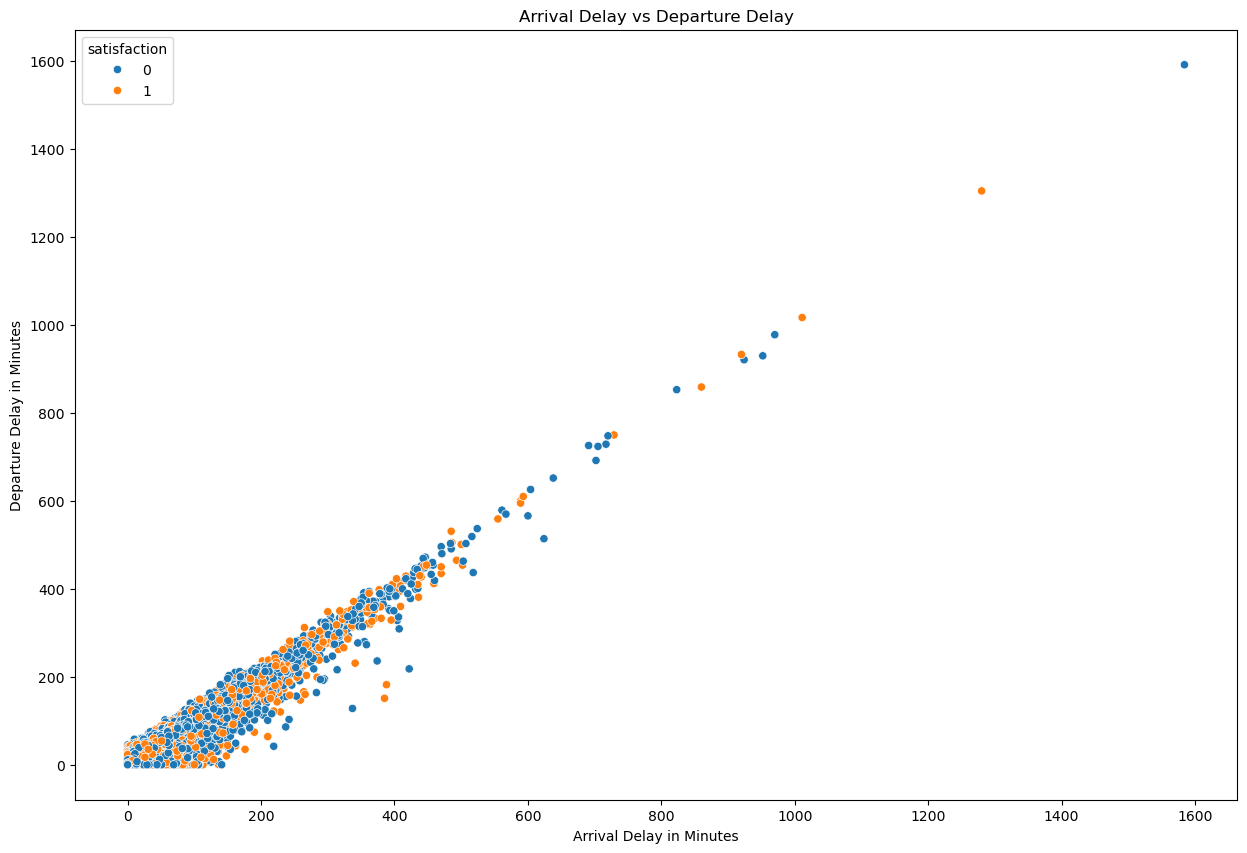

In [14]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='Arrival Delay in Minutes', y='Departure Delay in Minutes', hue='satisfaction')
plt.title('Arrival Delay vs Departure Delay')
plt.show()

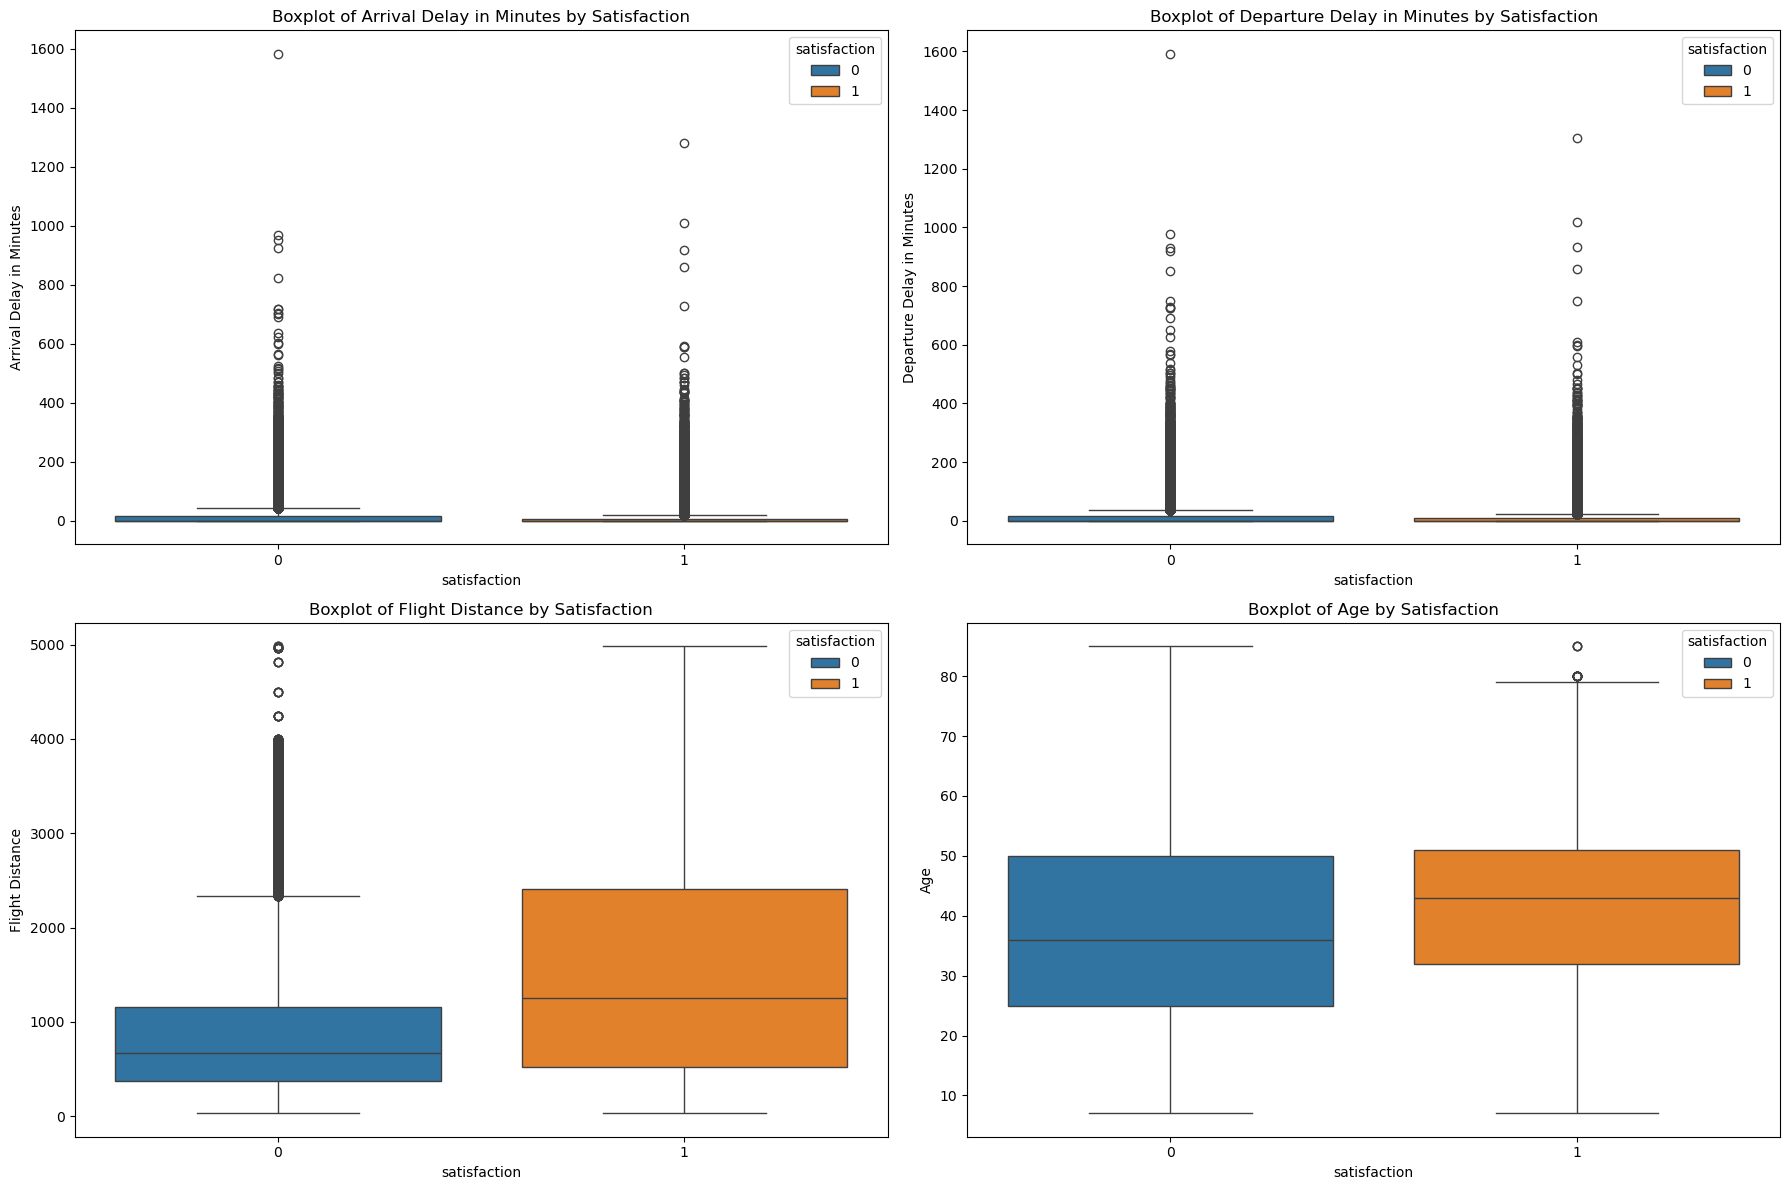

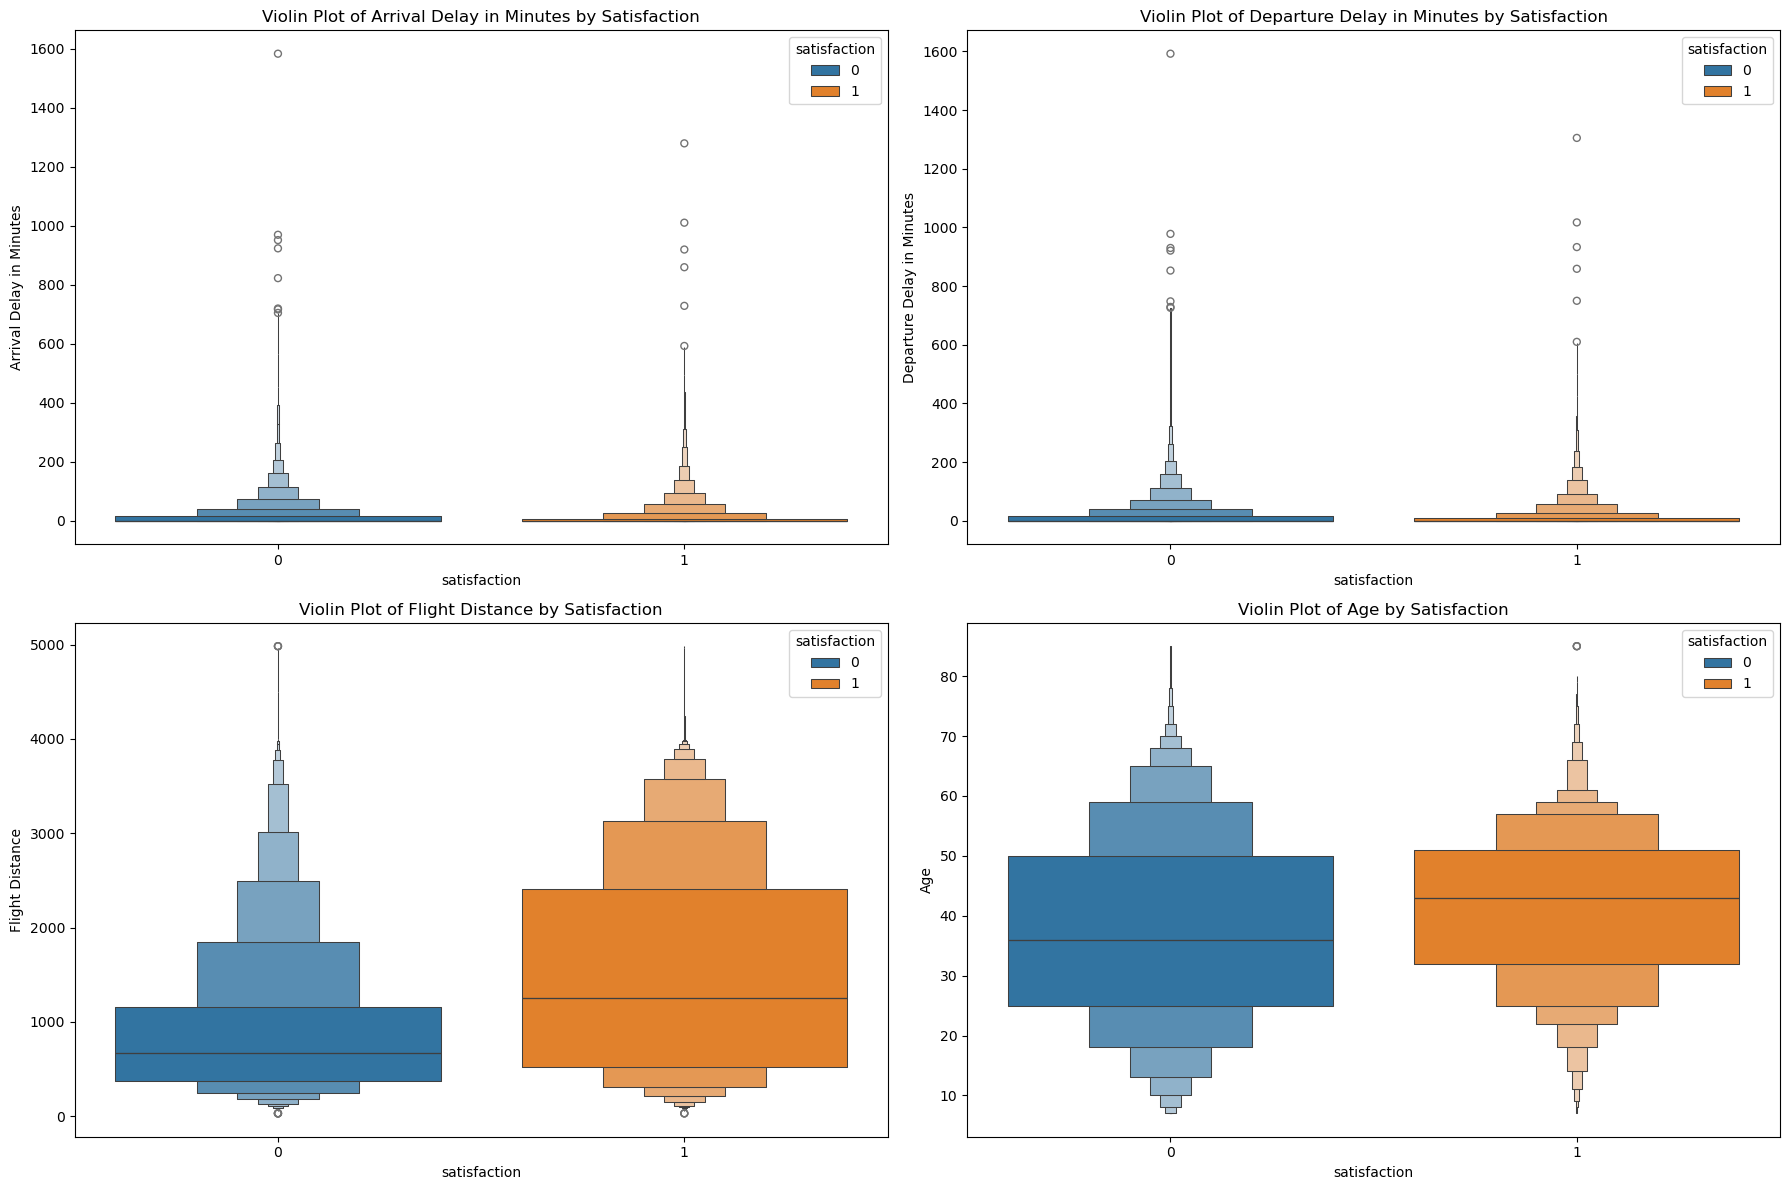

In [15]:
features = df[['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age', 'satisfaction']]
plt.figure(figsize=(18, 12))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='satisfaction', y=column, data=features, hue='satisfaction')
    plt.title(f'Boxplot of {column} by Satisfaction')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 12))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxenplot(x='satisfaction', y=column, data=features, hue='satisfaction')
    plt.title(f'Violin Plot of {column} by Satisfaction')
plt.tight_layout()
plt.show()


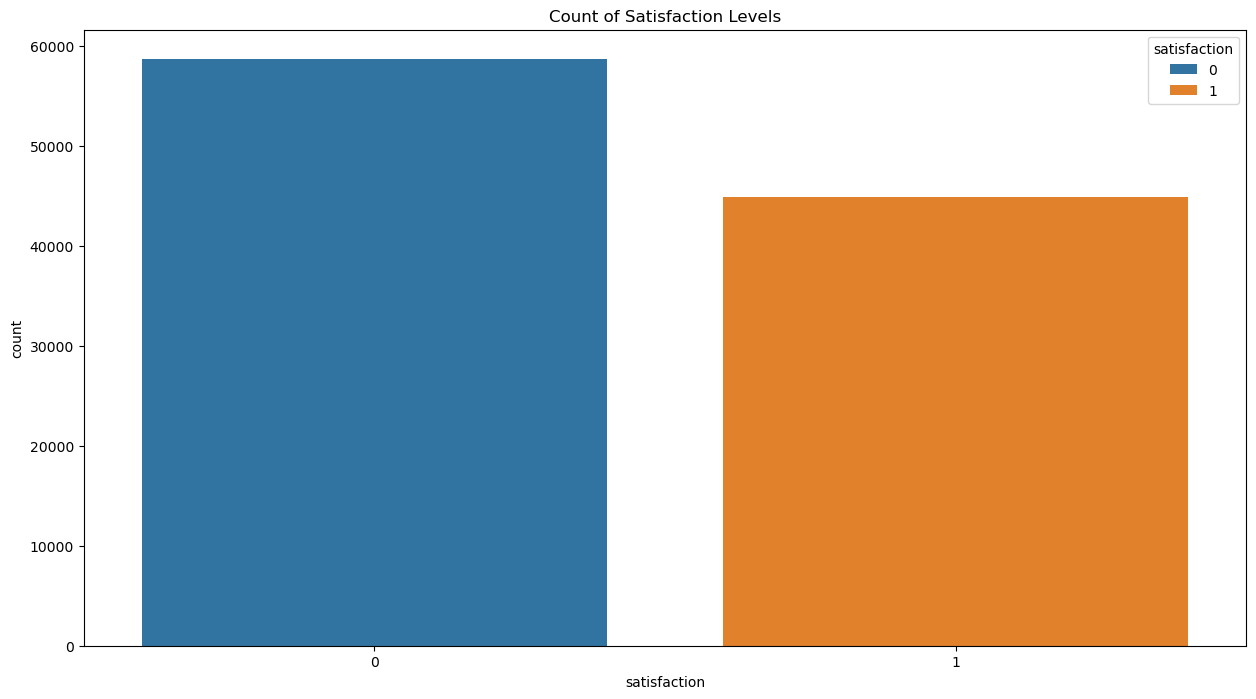

In [16]:
plt.figure(figsize=(15, 8))
sns.countplot(x='satisfaction', data=features, hue='satisfaction')
plt.title('Count of Satisfaction Levels')
plt.show()


### Distribution Analysis

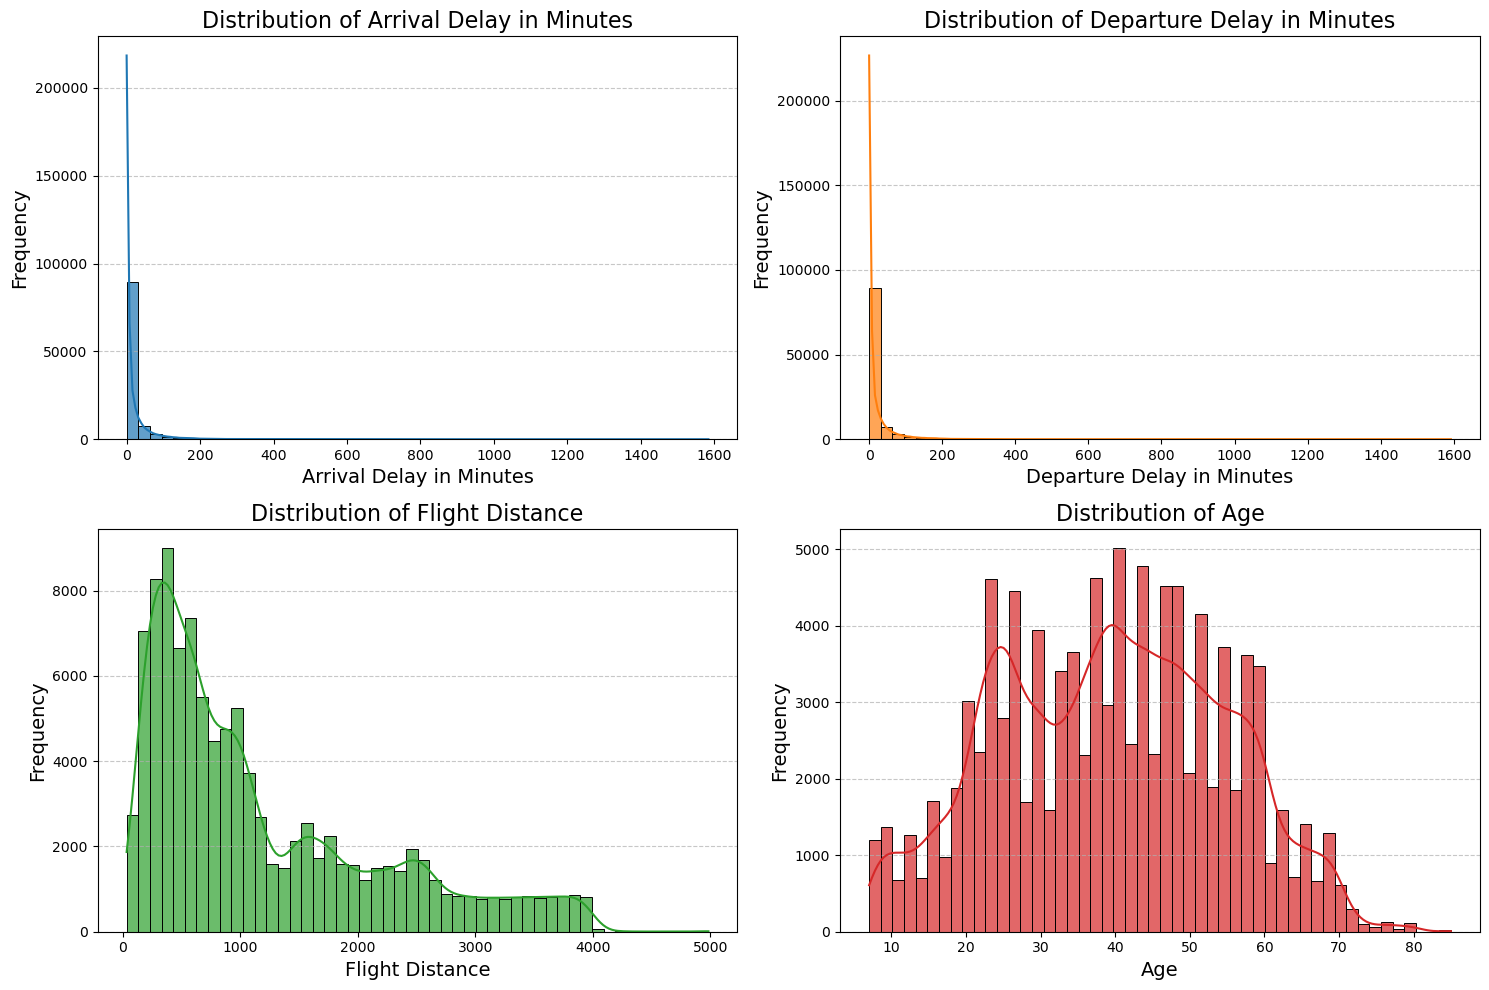

In [17]:
palette = sns.color_palette(n_colors=len(features.columns)-1)

plt.figure(figsize=(15, 10))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(features[column], kde=True, bins=50, color=palette[i-1], alpha=0.7)
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Observations:
- `Arrival Delay in Minutes`, `Departure Delay in Minutes` & `Flight Distance` columns are skewed.
- `Age` column needs to be binned.

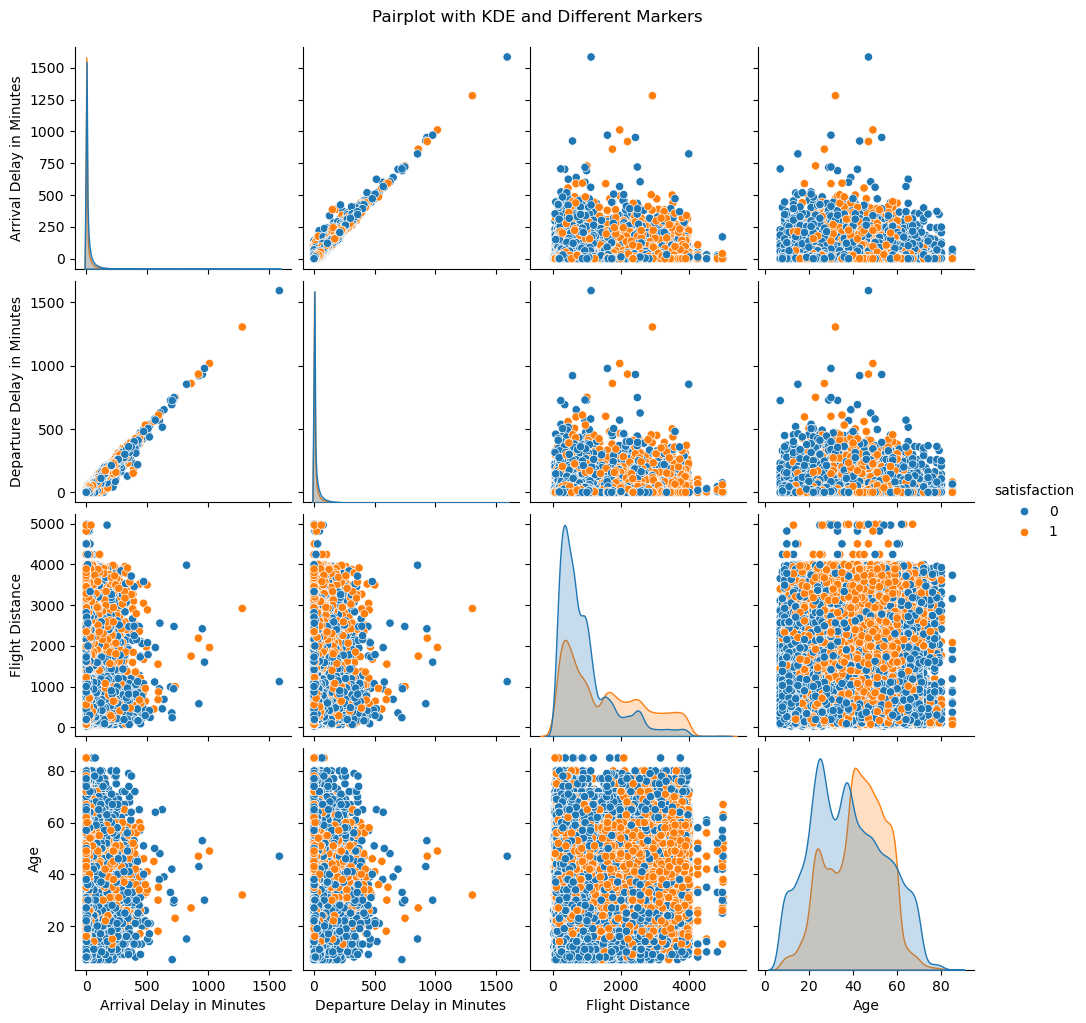

In [18]:
sns.pairplot(features, hue='satisfaction', diag_kind='kde', markers=["o", "o"])
plt.suptitle('Pairplot with KDE and Different Markers', y=1.02)
plt.show()

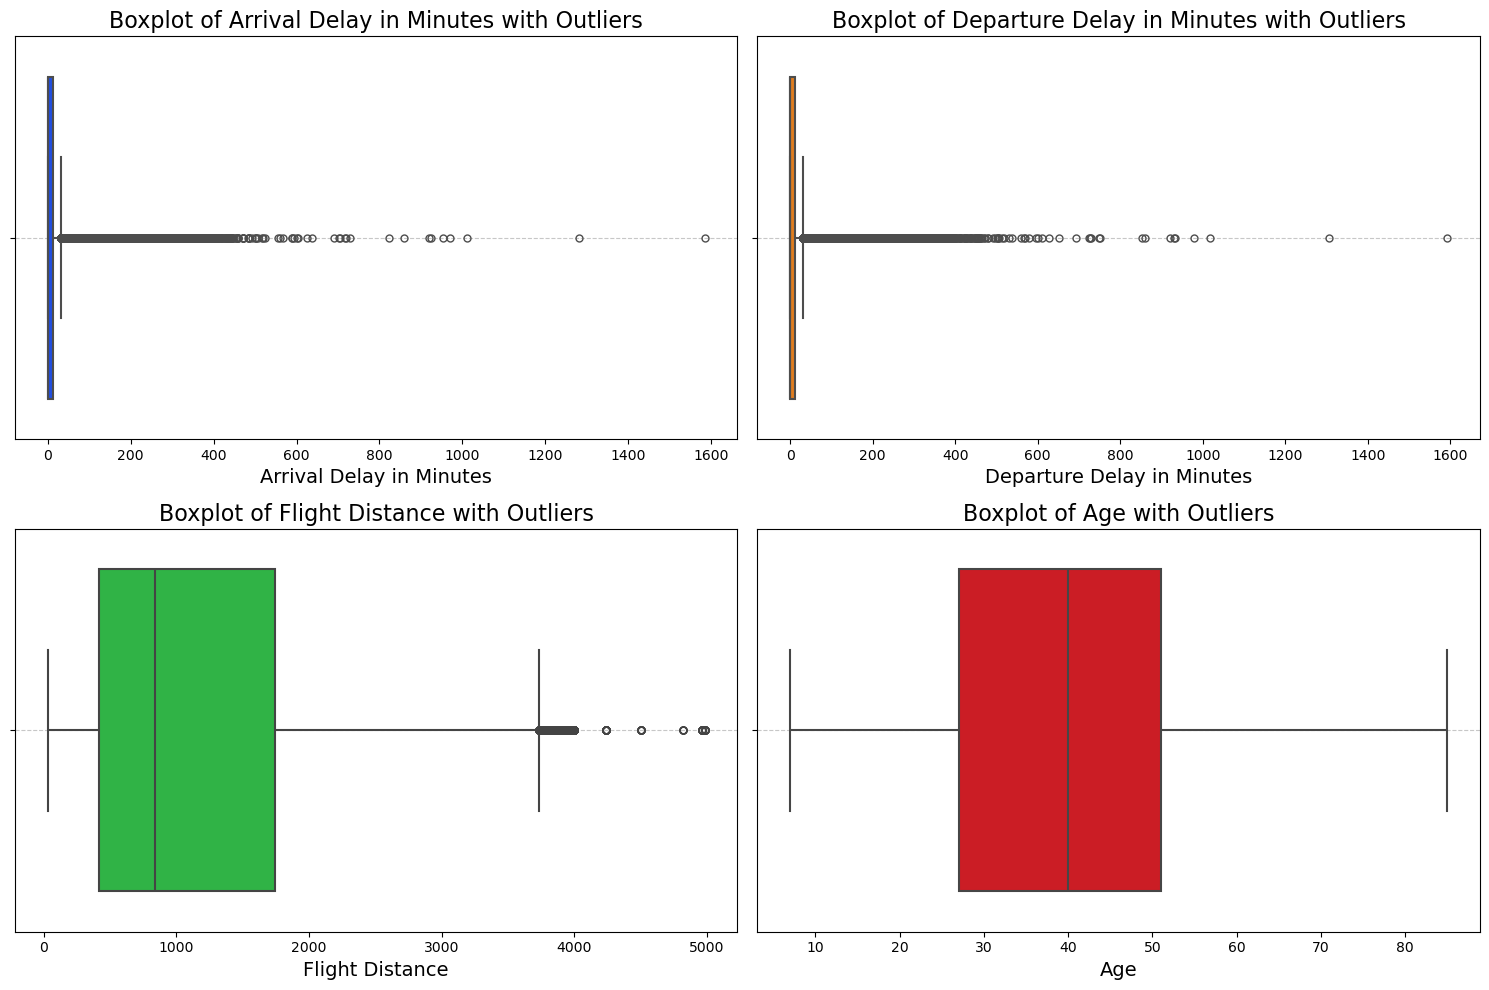

In [19]:
features = df[['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age', 'satisfaction']]


palette = sns.color_palette('bright', n_colors=len(features.columns)-1)

Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))

plt.figure(figsize=(15, 10))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=features[column], color=palette[i-1], fliersize=5, linewidth=1.5)
    plt.title(f'Boxplot of {column} with Outliers', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


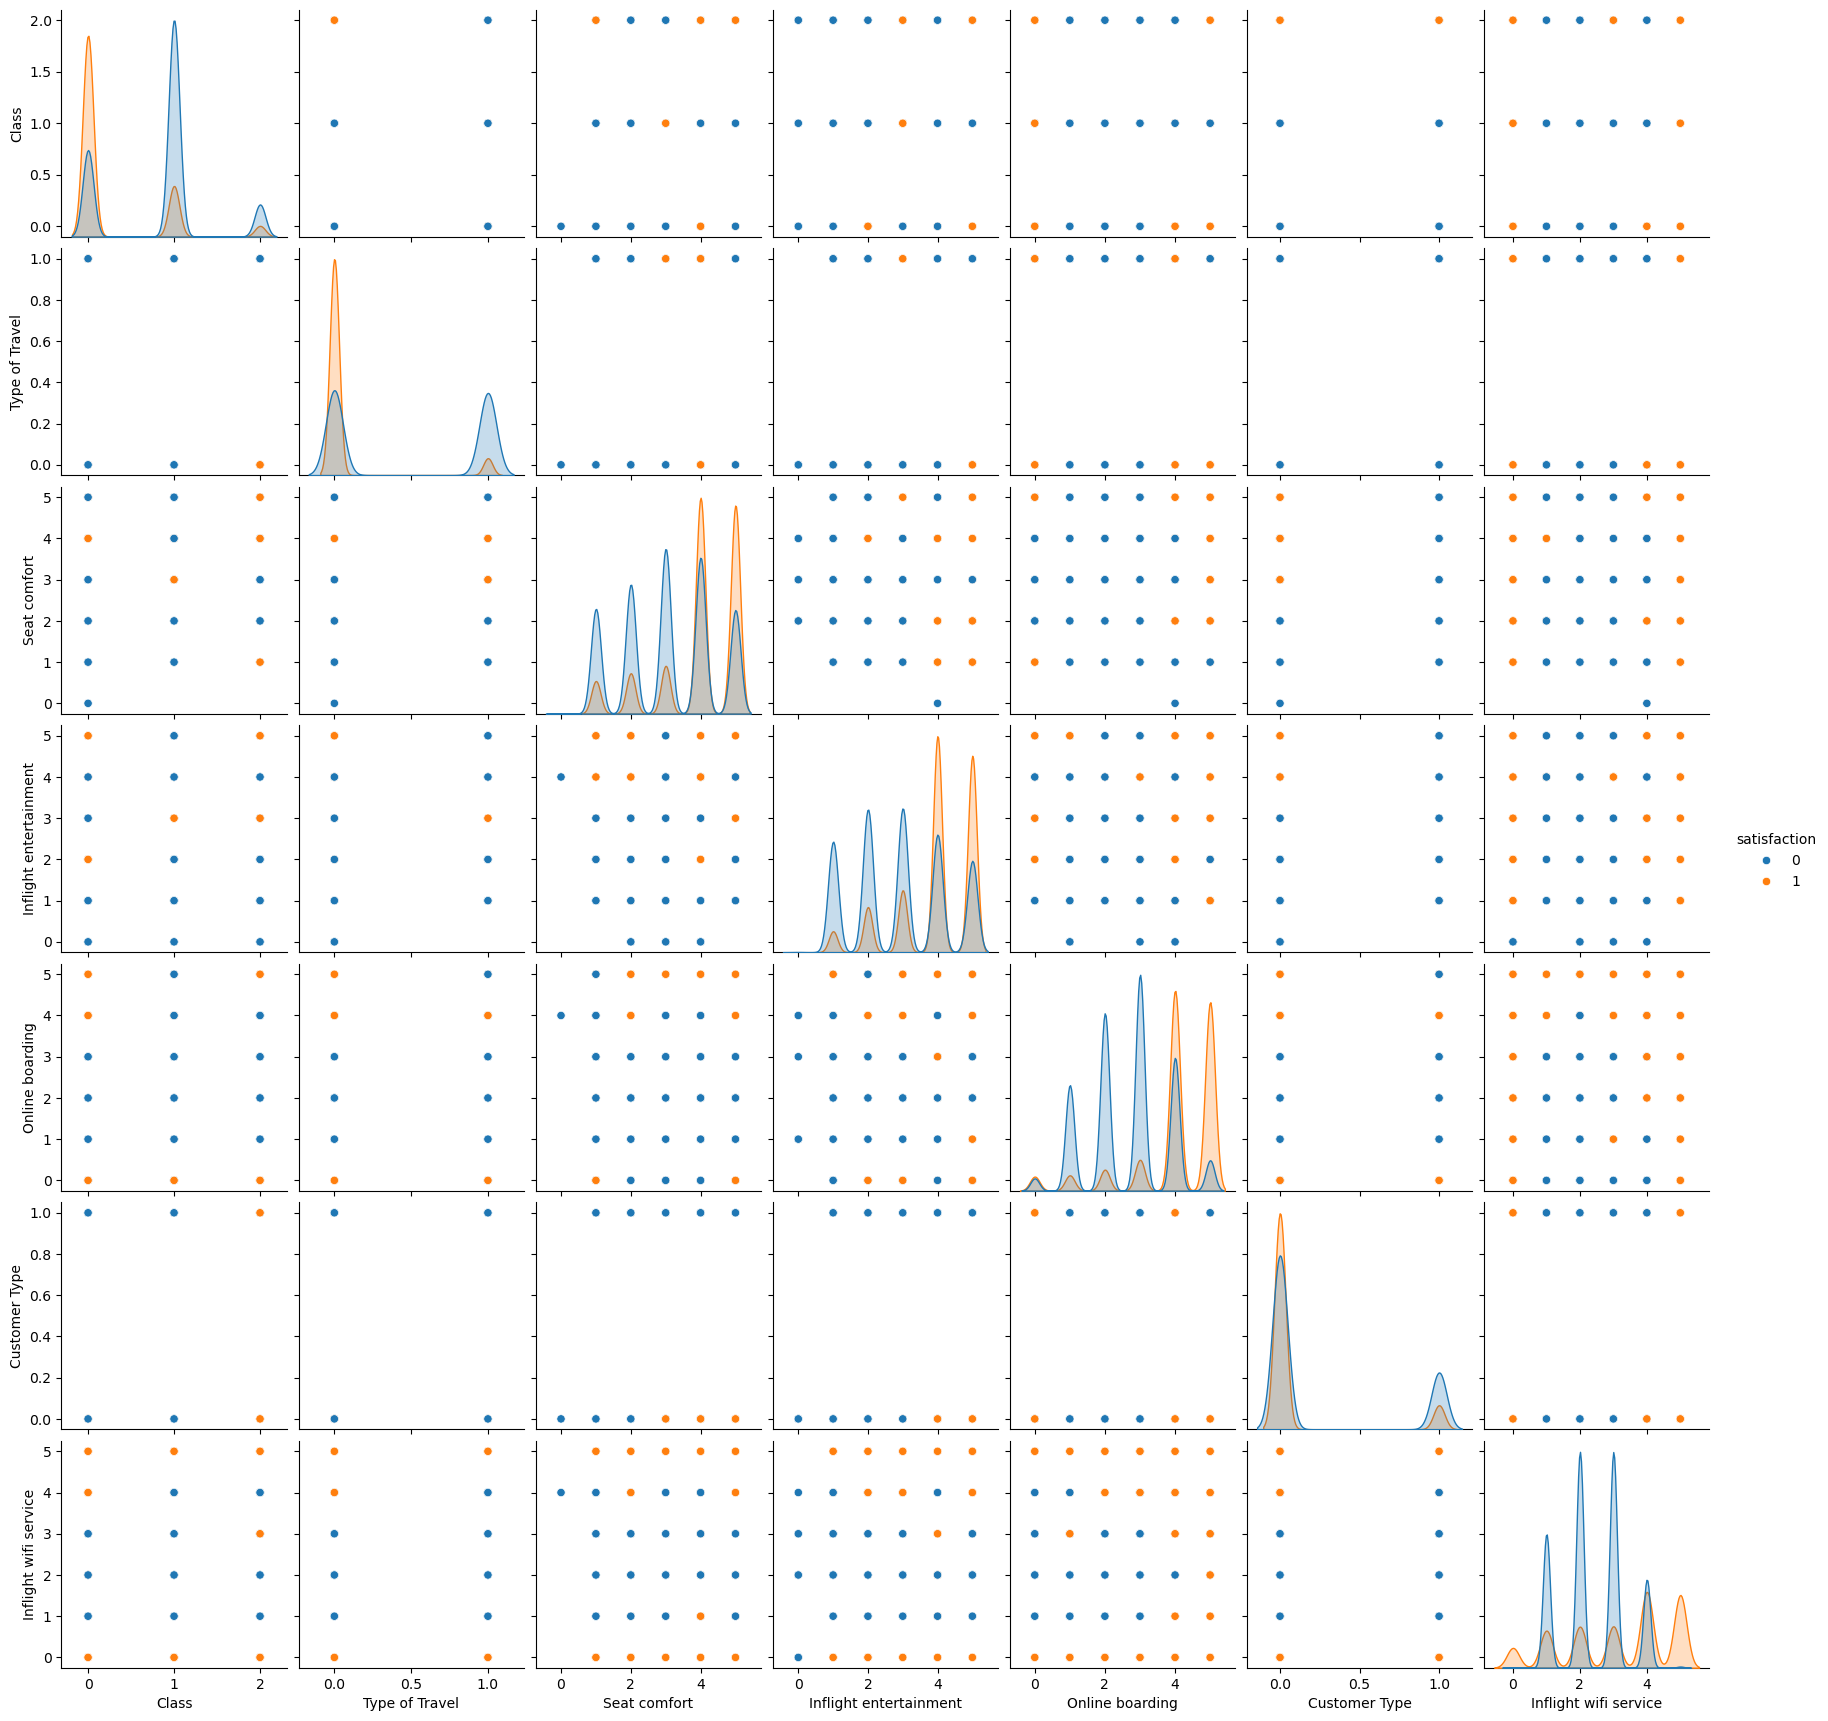

In [20]:
features = df[['Class', 'Type of Travel', 'Seat comfort', 'Inflight entertainment', 'Online boarding', 'Customer Type', 'Inflight wifi service', 'satisfaction']]

sns.pairplot(features, hue='satisfaction')

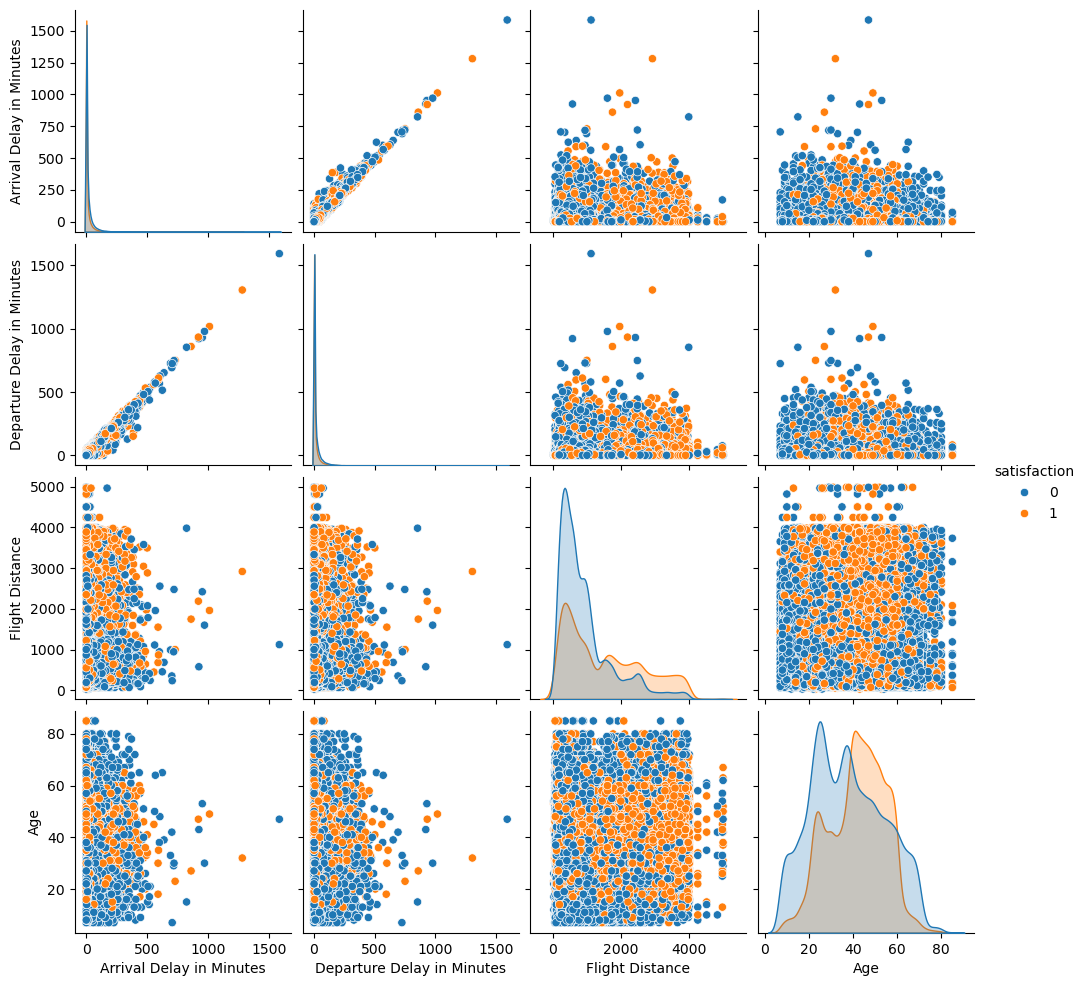

In [21]:
features = df[['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age', 'satisfaction']]

sns.pairplot(features, hue='satisfaction')

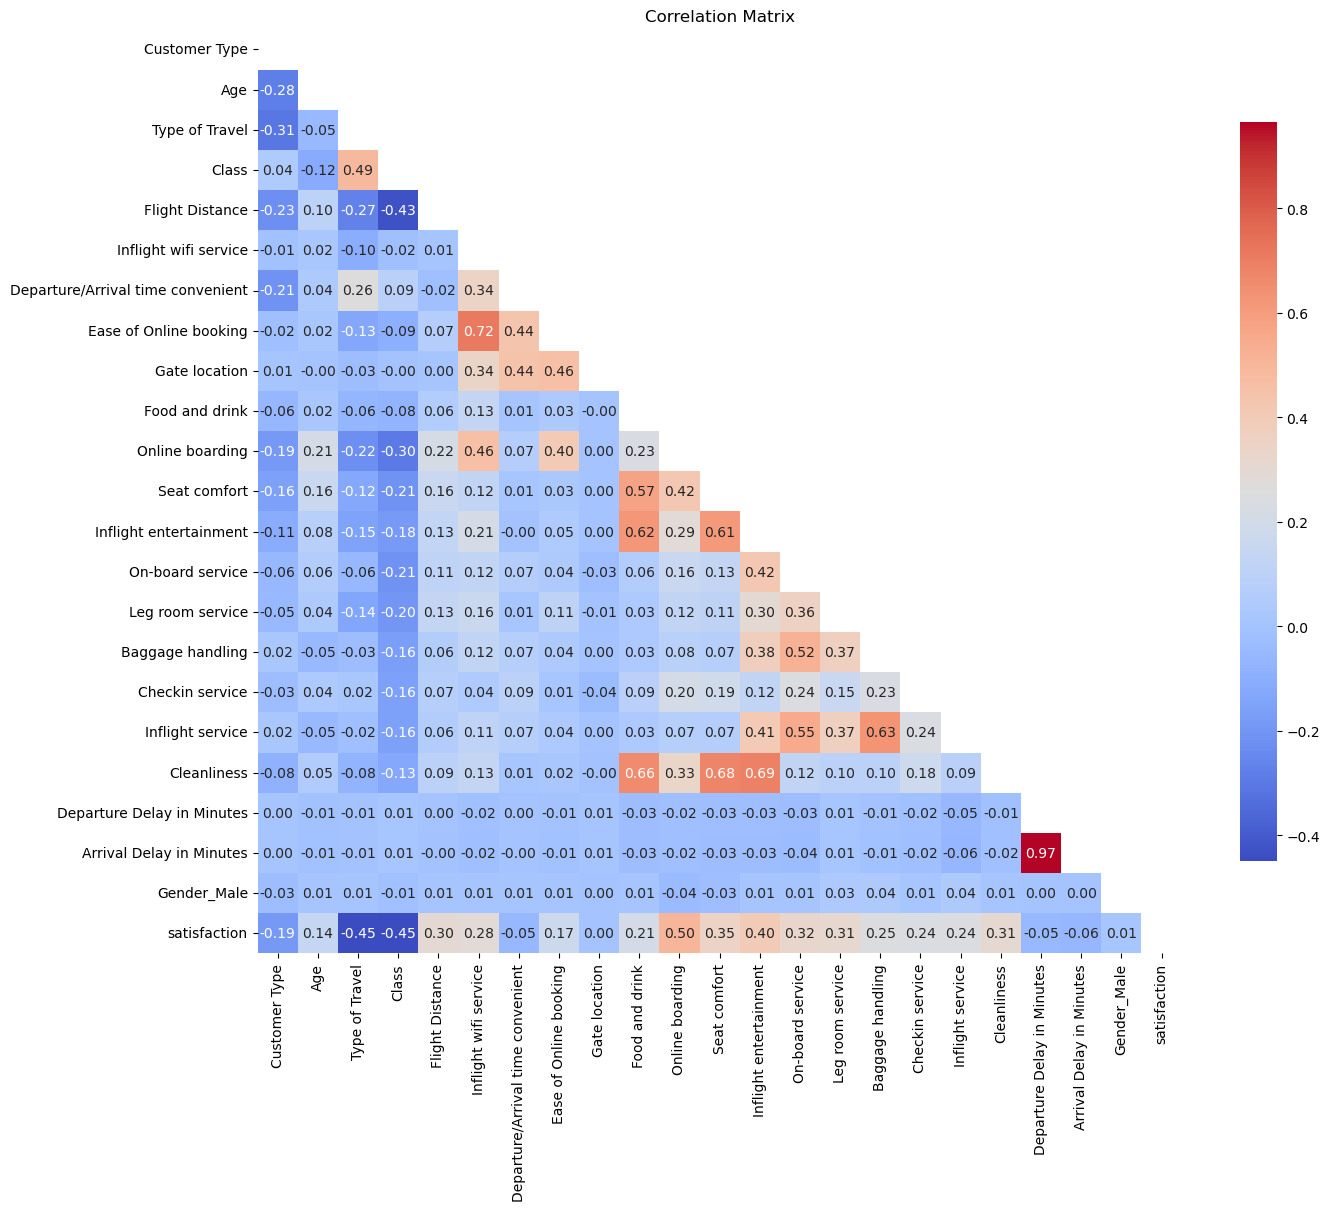

In [22]:
df = df[[col for col in df.columns if col != 'satisfaction'] + ['satisfaction']]

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 12))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [23]:
from sklearn.preprocessing import PowerTransformer

numerical_cols = df.select_dtypes(include=[np.number]).columns
skewed_cols = df[numerical_cols].apply(lambda x: x.skew()).abs()
skewed_cols = skewed_cols[skewed_cols > 0.5].index

def transform_skewed(df, method="log"):
    df_transformed = df.copy()
    
    if method == "log":
        for col in skewed_cols:
            df_transformed[col] = np.log1p(df_transformed[col])
    elif method == "sqrt":
        for col in skewed_cols:
            df_transformed[col] = np.sqrt(df_transformed[col])
    elif method == "yeo-johnson":
        pt = PowerTransformer(method="yeo-johnson")
        df_transformed[skewed_cols] = pt.fit_transform(df_transformed[skewed_cols])

    return df_transformed

df = transform_skewed(df, method="yeo-johnson")


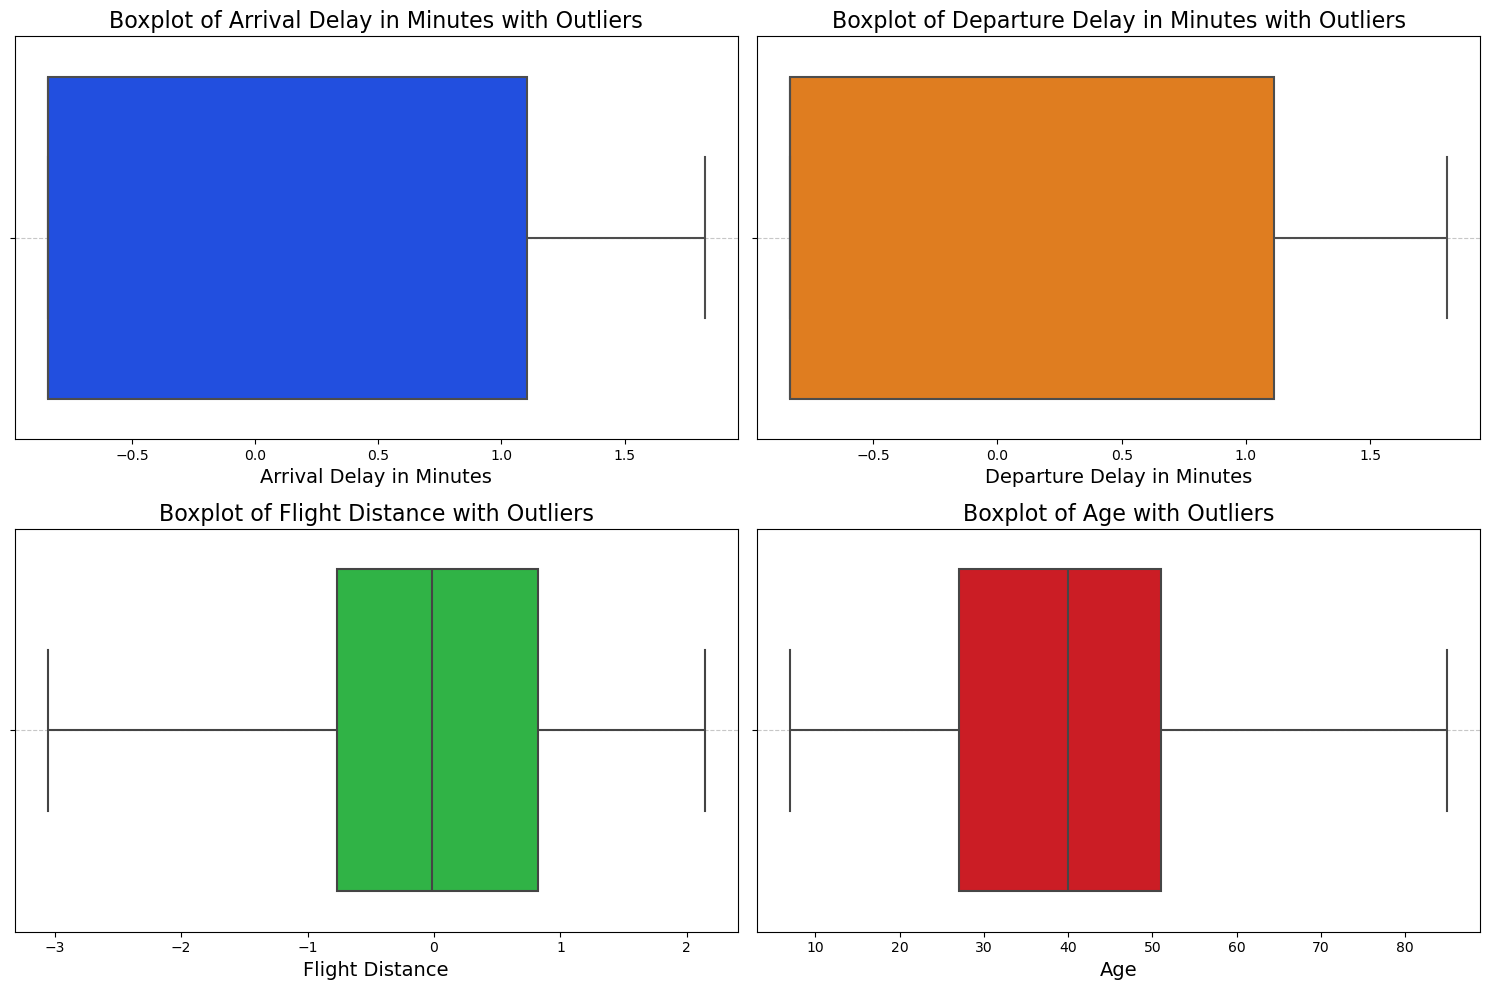

In [24]:
features = df[['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age', 'satisfaction']]


palette = sns.color_palette('bright', n_colors=len(features.columns)-1)

Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))

plt.figure(figsize=(15, 10))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=features[column], color=palette[i-1], fliersize=5, linewidth=1.5)
    plt.title(f'Boxplot of {column} with Outliers', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Interaction Features


In [25]:
def age_group(df):
    bins = [7, 18, 30, 40, 50, 60, 70, 80, 85]
    labels = ['7-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-85']
    df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
    df = df.drop(columns=['Age'])
    df = pd.get_dummies(df, columns=['age_group'], prefix='age')
    return df
df = age_group(df)

In [26]:
from itertools import combinations

def feature_engineer(df):
    # Columns selected based on Correlation Matrix effectiveness
    columns = ['Online boarding', 'Inflight wifi service', 'Inflight service', 'Type of Travel']
    new_columns = []

    for feature1, feature2 in combinations(columns, 2):
        if feature1 != 'satisfaction' and feature2 != 'satisfaction':
            interaction_feature_name = f"{feature1}_x_{feature2}"
            new_column = (df[feature1] + df[feature2])
            new_columns.append(pd.Series(new_column, name=interaction_feature_name))

    df = pd.concat([df] + new_columns, axis=1)
    return df

df = feature_engineer(df)

In [27]:
# Not needed here (but effective) but may need in future
def remove_collinearity_with_target(df, target_col, high_threshold=0.90, low_threshold=0.3):
    X = df.drop(columns=[target_col])
    target_corr = X.corrwith(df[target_col]).abs()  
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    to_drop = set()

    for col in X.columns:
        if target_corr[col] < low_threshold:
            to_drop.add(col)
            continue  

        for feat in upper.index[upper[col] > high_threshold]:  
            if target_corr[col] < target_corr[feat]:  
                to_drop.add(col)
                break

    return df.drop(columns=list(to_drop))

# df = remove_collinearity_with_target(df, 'satisfaction', low_threshold=0.15, high_threshold=0.80)

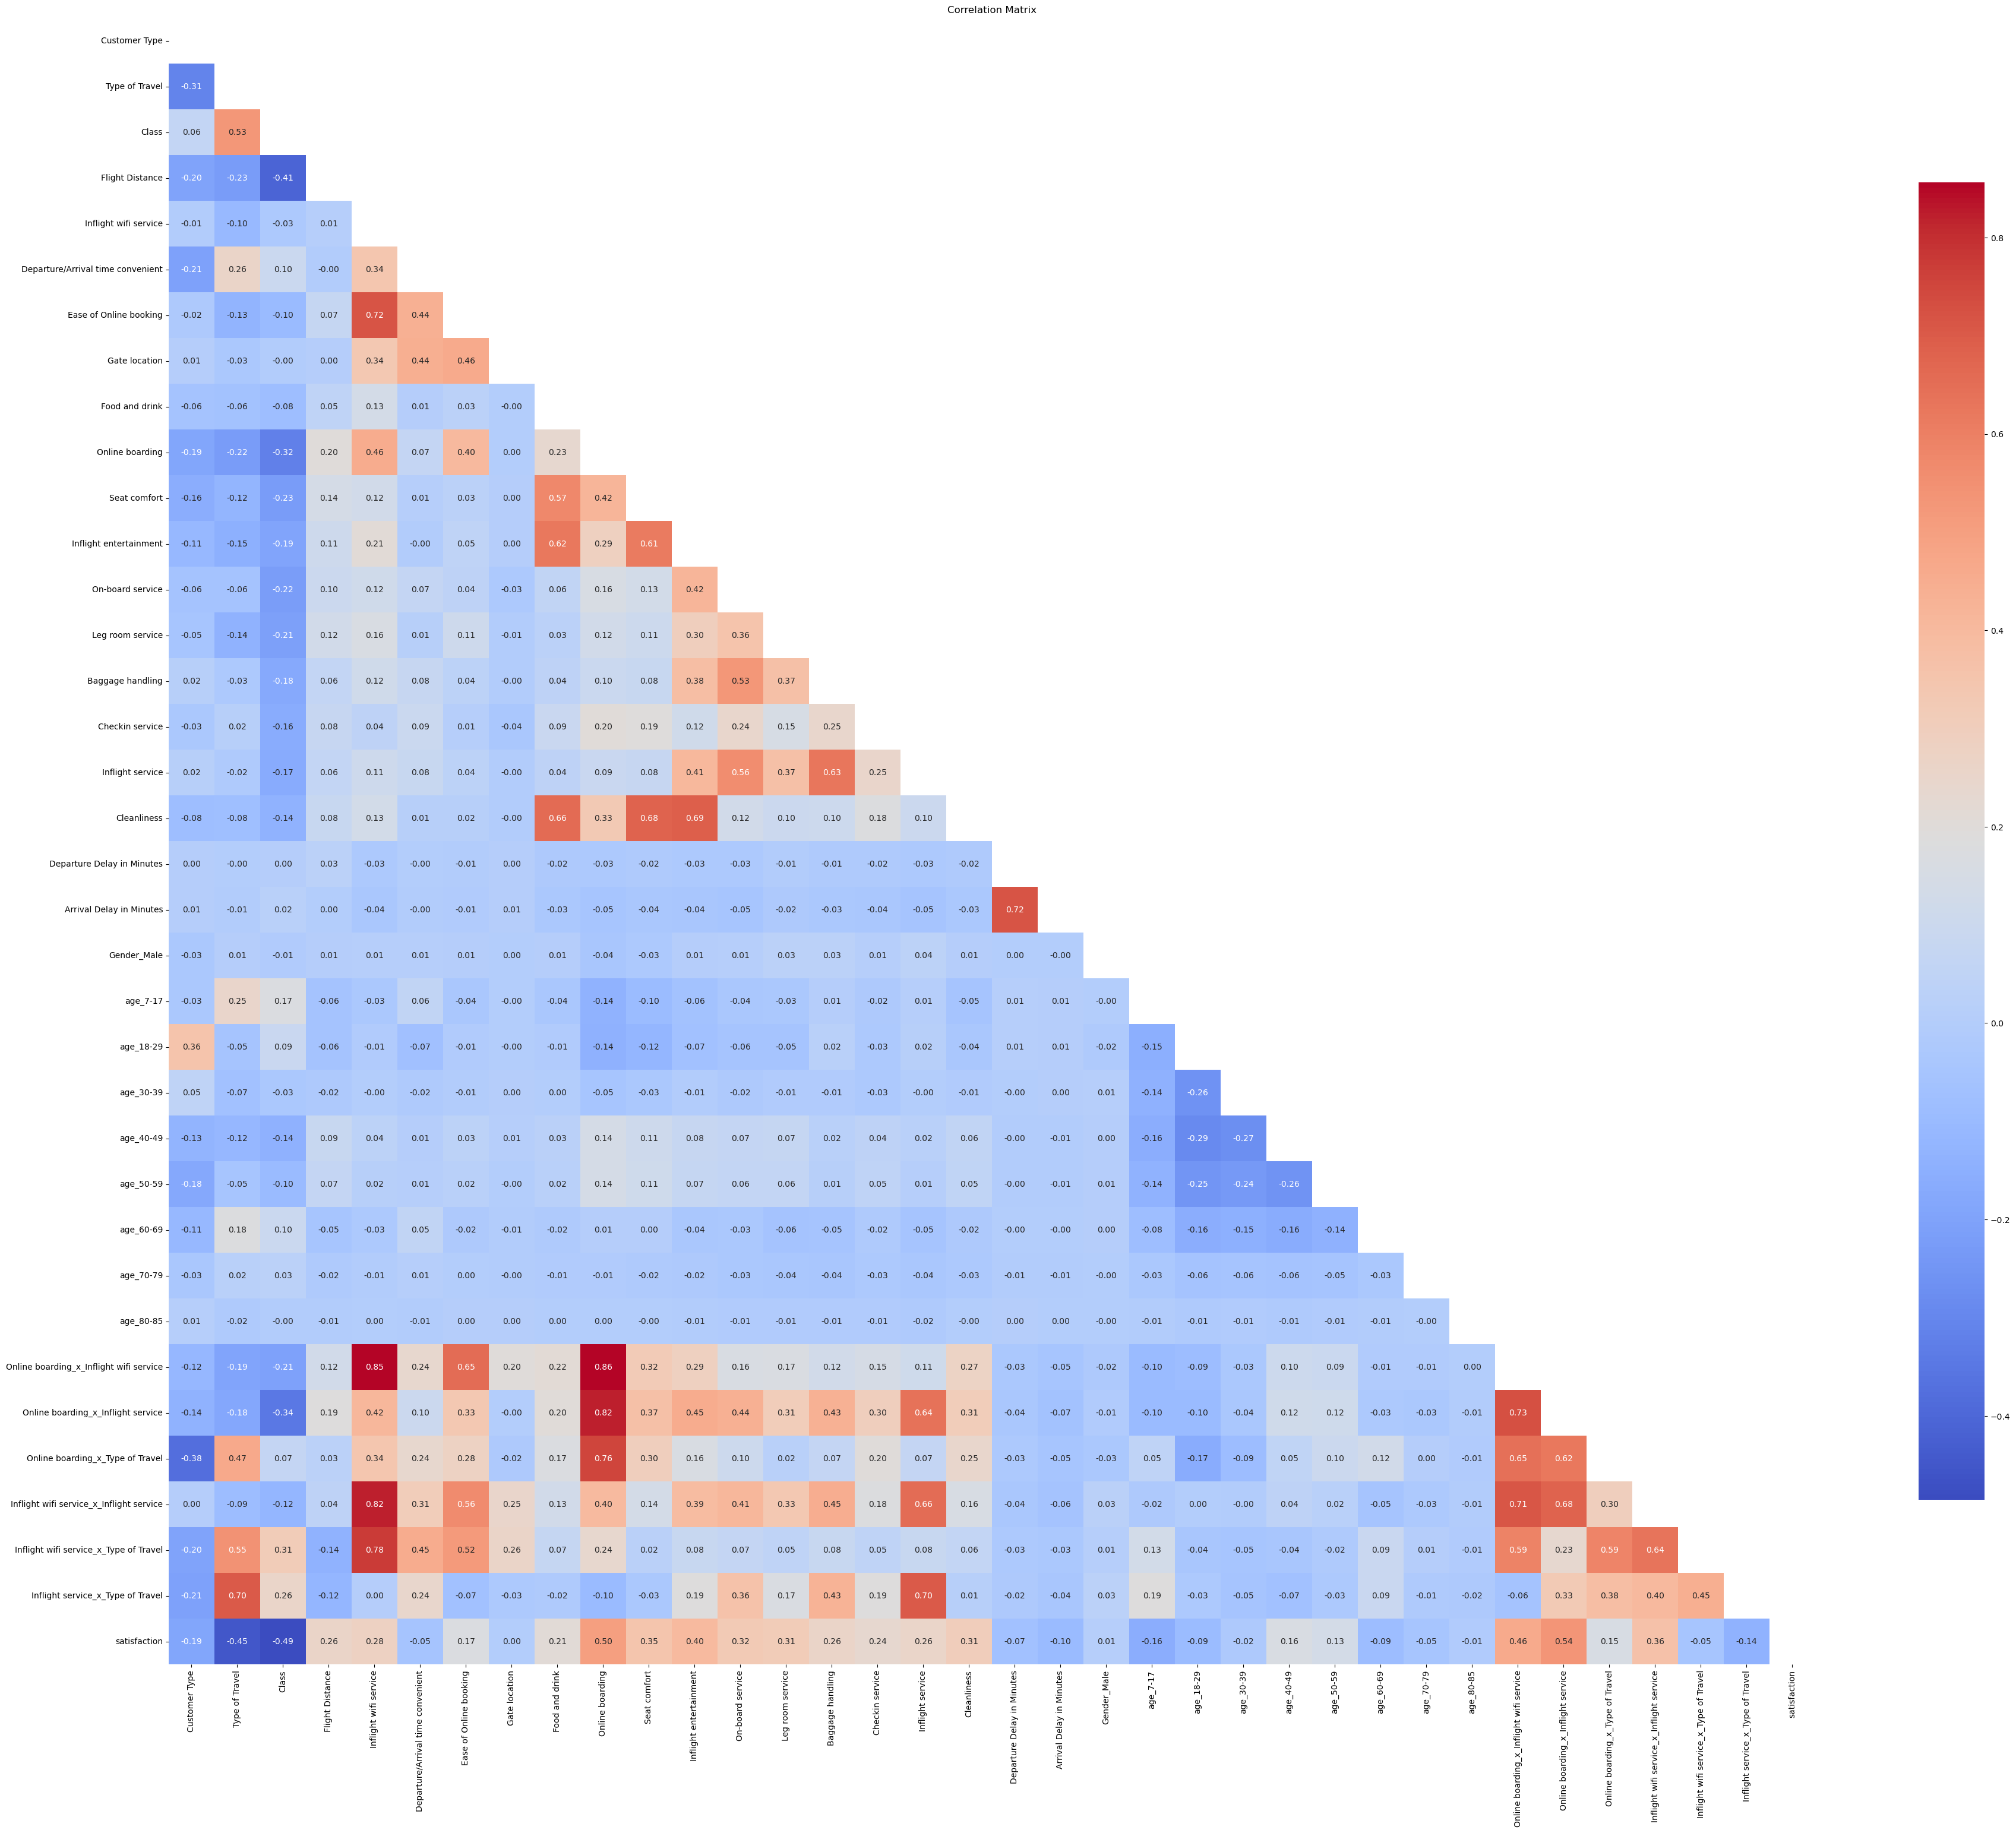

In [28]:
df = df[[col for col in df.columns if col != 'satisfaction'] + ['satisfaction']]

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(45, 36))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

## Model Training

### Baseline Model

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

baseline_model = LogisticRegression(random_state=42, max_iter=100000)
baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:, 1])
report = classification_report(y_test, y_pred)

print(f"Baseline Model Accuracy: {accuracy:.4f}")
print(f"Baseline Model ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(report)

Baseline Model Accuracy: 0.8759
Baseline Model ROC AUC: 0.9253

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11740
           1       0.87      0.84      0.85      8979

    accuracy                           0.88     20719
   macro avg       0.88      0.87      0.87     20719
weighted avg       0.88      0.88      0.88     20719



### Baseline Tree-based models

In [30]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, r2_score

models = {
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(random_seed=42, verbose=False)
}

predictions = {}
for name, model in models.items():
    print(f"\n{'-'*50}")
    print(f"{name} Results:")
    model.fit(X_train, y_train)
    
    predictions[name] = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, predictions[name]):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, predictions[name]):.4f}")
    print(f"R2 Score: {r2_score(y_test, predictions[name]):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, predictions[name], digits=3))


--------------------------------------------------
XGBoost Results:
Accuracy: 0.9638
ROC AUC: 0.9617
R2 Score: 0.8526

Classification Report:
              precision    recall  f1-score   support

           0      0.959     0.978     0.968     11740
           1      0.970     0.946     0.958      8979

    accuracy                          0.964     20719
   macro avg      0.965     0.962     0.963     20719
weighted avg      0.964     0.964     0.964     20719


--------------------------------------------------
LightGBM Results:
Accuracy: 0.9631
ROC AUC: 0.9605
R2 Score: 0.8496

Classification Report:
              precision    recall  f1-score   support

           0      0.956     0.980     0.968     11740
           1      0.973     0.941     0.957      8979

    accuracy                          0.963     20719
   macro avg      0.964     0.961     0.962     20719
weighted avg      0.963     0.963     0.963     20719


--------------------------------------------------
CatBoos

In [31]:
models_comparison = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy': [accuracy_score(y_test, predictions[model]) for model in models.keys()],
    'ROC AUC': [roc_auc_score(y_test, predictions[model]) for model in models.keys()],
    'R2 score': [r2_score(y_test, predictions[model]) for model in models.keys()]
})
models_comparison = models_comparison.sort_values('Accuracy', ascending=False)

print("\n" + "="*50)
print("Models Comparison:")
print(models_comparison.to_string(index=False))


Models Comparison:
   Model  Accuracy  ROC AUC  R2 score
CatBoost  0.965346 0.963122  0.858877
 XGBoost  0.963801 0.961667  0.852588
LightGBM  0.963077 0.960531  0.849639


### SHAP explanation

0:	learn: 0.5912157	total: 25.8ms	remaining: 12.9s
200:	learn: 0.0834738	total: 6.78s	remaining: 10.1s
400:	learn: 0.0684719	total: 14s	remaining: 3.45s
499:	learn: 0.0632302	total: 17.4s	remaining: 0us


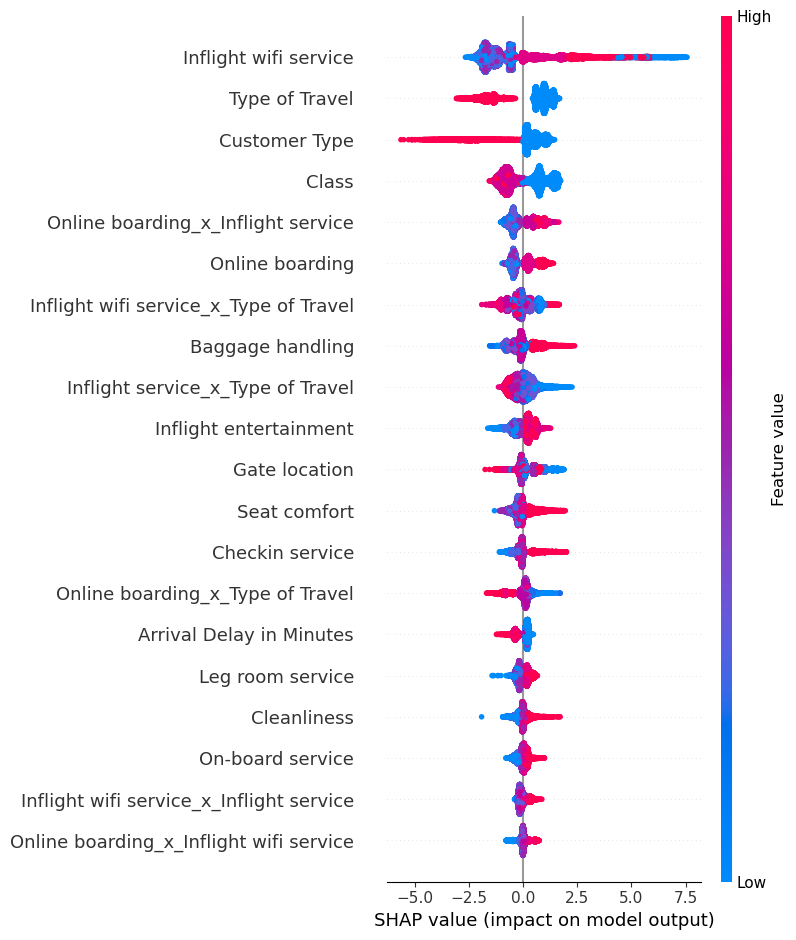

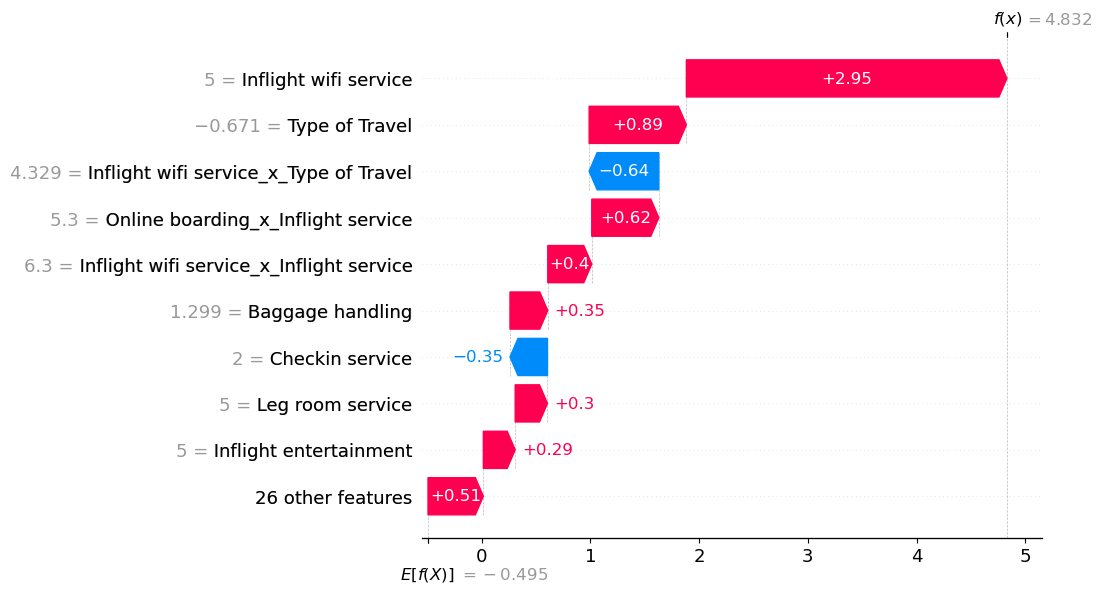

In [32]:
import shap
from catboost import CatBoostClassifier, Pool

categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

for col in categorical_cols:
    df[col] = df[col].astype(str)

from sklearn.model_selection import train_test_split
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_pool = Pool(X_train, label=y_train, cat_features=categorical_cols)
test_pool = Pool(X_test, label=y_test, cat_features=categorical_cols)

model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=8, verbose=200)
model.fit(train_pool)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

shap.plots.waterfall(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_test.iloc[0]))

### Model Hyper-parameter Tuning (Optuna)

[I 2025-03-28 05:40:05,265] A new study created in memory with name: no-name-77c48a50-13d7-4a15-a673-0174b2e918e5
[I 2025-03-28 05:40:16,582] Trial 0 finished with value: 0.9563428797258012 and parameters: {'depth': 7, 'learning_rate': 0.43062551331615756, 'l2_leaf_reg': 1.2224823627819348, 'subsample': 0.97817828776291}. Best is trial 0 with value: 0.9563428797258012.
[I 2025-03-28 05:40:22,154] Trial 1 finished with value: 0.9599953614222894 and parameters: {'depth': 4, 'learning_rate': 0.15810135296963101, 'l2_leaf_reg': 2.1743359858689524, 'subsample': 0.585014857067877}. Best is trial 1 with value: 0.9599953614222894.
[I 2025-03-28 05:40:27,881] Trial 2 finished with value: 0.9333262715786018 and parameters: {'depth': 7, 'learning_rate': 0.0030515685983848297, 'l2_leaf_reg': 2.6616844875014958, 'subsample': 0.841074586514378}. Best is trial 1 with value: 0.9599953614222894.
[I 2025-03-28 05:40:33,553] Trial 3 finished with value: 0.9591437314722426 and parameters: {'depth': 11, 'l

Best Parameters: {'depth': 6, 'learning_rate': 0.14870726880230162, 'l2_leaf_reg': 3.1384378146620255, 'subsample': 0.5486859064125892}

Model Performance:
accuracy: 0.9634152227424103
roc_auc: 0.9950913384305952
avg_precision: 0.9941513883763948
classification_report:               precision    recall  f1-score   support

           0       0.96      0.97      0.97     11740
           1       0.97      0.95      0.96      8979

    accuracy                           0.96     20719
   macro avg       0.96      0.96      0.96     20719
weighted avg       0.96      0.96      0.96     20719



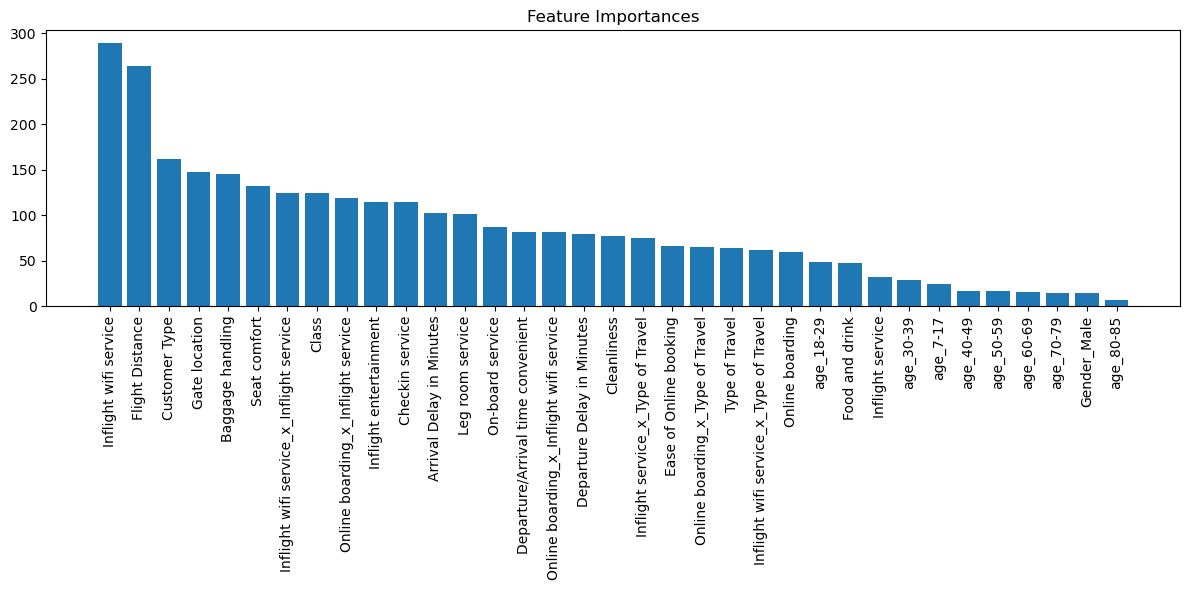

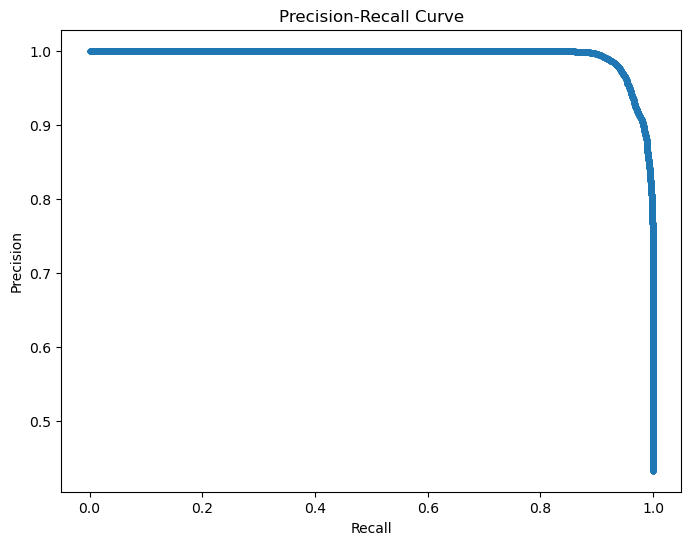

In [33]:
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.pipeline import Pipeline

def preprocess_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(
        X, y, 
        test_size=test_size, 
        stratify=y, 
        random_state=random_state
    )

def objective_lightgbm(trial, X_train, y_train):
    params = {
        # 'iterations': trial.suggest_int('iterations', 50, 1000),
        'depth': trial.suggest_int('depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.5, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 5),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
    }
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LGBMClassifier(
            **params, 
            random_state=42, 
            n_jobs=-1,
            class_weight='balanced'
        ))
    ])
    
    scores = cross_val_score(
        pipeline, 
        X_train, 
        y_train, 
        cv=cv, 
        scoring='balanced_accuracy',
        n_jobs=-1
    )
    
    return np.mean(scores)

def train_lightgbm(X_train, y_train, n_trials=100):
    study = optuna.create_study(direction='maximize')
    
    study.optimize(
        lambda trial: objective_lightgbm(trial, X_train, y_train), 
        n_trials=n_trials
    )
    
    best_params = study.best_params
    print("Best Parameters:", best_params)
    
    final_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LGBMClassifier(
            **best_params, 
            random_state=42, 
            n_jobs=-1,
            class_weight='balanced'
        ))
    ])
    
    final_pipeline.fit(X_train, y_train)
    
    return best_params, final_pipeline

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba),
        'avg_precision': average_precision_score(y_test, y_pred_proba),
        'classification_report': classification_report(y_test, y_pred)
    }
    
    return metrics

def plot_feature_importance(model, feature_names):
    importances = model.named_steps['classifier'].feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

def plot_precision_recall_curve(y_test, y_pred_proba):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

def main(X, y, feature_names):
    X = pd.DataFrame(X)
    y = pd.Series(y)
    
    X_train, X_test, y_train, y_test = preprocess_data(X, y)
    
    best_params, model = train_lightgbm(X_train, y_train, 300)
    
    metrics = evaluate_model(model, X_test, y_test)
    
    print("\nModel Performance:")
    for key, value in metrics.items():
        print(f"{key}: {value}")
    
    plot_feature_importance(model, feature_names)
    plot_precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    
    return model, metrics, best_params

model, metrics, best_params = main(X, y, feature_names=df.columns.tolist())
# This took 13 minutes 16.2 seconds

## Model Evaluation

0:	learn: 0.8691644	test: 0.8684782	best: 0.8684782 (0)	total: 21.4ms	remaining: 21.4s
200:	learn: 0.9617376	test: 0.9603263	best: 0.9603263 (200)	total: 4.01s	remaining: 15.9s
400:	learn: 0.9660211	test: 0.9630291	best: 0.9631739 (387)	total: 8.11s	remaining: 12.1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9634152227
bestIteration = 460

Shrink model to first 461 iterations.


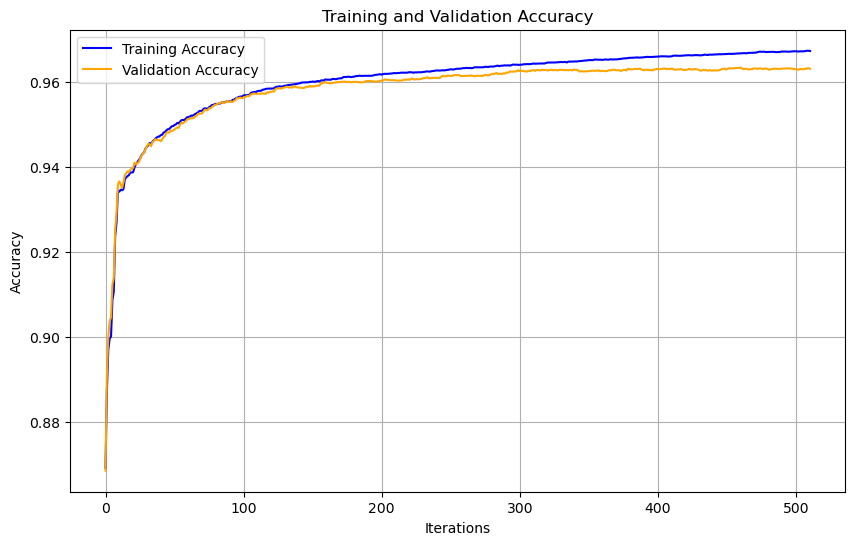

Accuracy: 0.9634152227424103
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11655
           1       0.98      0.94      0.96      9064

    accuracy                           0.96     20719
   macro avg       0.97      0.96      0.96     20719
weighted avg       0.96      0.96      0.96     20719



['cat_model.pkl']

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Parameters found from Optuna tuning
cb_params = {'depth': 4, 'learning_rate': 0.17244137403542156, 'l2_leaf_reg': 3.258820179105591, 'subsample': 0.7977884243064802}

model = CatBoostClassifier(
    **cb_params,
    loss_function="Logloss",
    eval_metric="Accuracy",
    random_seed=42,
    verbose=200 
)

model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=50, use_best_model=True)

evals_result = model.get_evals_result()

plt.figure(figsize=(10, 6))
plt.plot(evals_result['learn']['Accuracy'], label='Training Accuracy', color='blue')
plt.plot(evals_result['validation']['Accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
joblib.dump(model, 'models/cat_model.pkl')

### Cross validation

In [35]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_list, roc_auc_list = [], []
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy_list.append(accuracy_score(y_test, y_pred))
    roc_auc_list.append(roc_auc_score(y_test, y_pred))

print("Cross-Validation Results:")
print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.4f}")
print(f"ROC AUC: {np.mean(roc_auc_list):.4f} ± {np.std(roc_auc_list):.4f}")

0:	learn: 0.8691403	total: 23.1ms	remaining: 23.1s
200:	learn: 0.9622443	total: 4.23s	remaining: 16.8s
400:	learn: 0.9663952	total: 8.33s	remaining: 12.4s
600:	learn: 0.9691463	total: 12.4s	remaining: 8.23s
800:	learn: 0.9713183	total: 16.4s	remaining: 4.08s
999:	learn: 0.9729351	total: 20.5s	remaining: 0us
0:	learn: 0.8699125	total: 21.7ms	remaining: 21.6s
200:	learn: 0.9622564	total: 4.25s	remaining: 16.9s
400:	learn: 0.9663228	total: 9.15s	remaining: 13.7s
600:	learn: 0.9686395	total: 13.1s	remaining: 8.69s
800:	learn: 0.9710528	total: 17.8s	remaining: 4.41s
999:	learn: 0.9730317	total: 23.7s	remaining: 0us
0:	learn: 0.8691041	total: 47.1ms	remaining: 47s
200:	learn: 0.9629925	total: 5.82s	remaining: 23.1s
400:	learn: 0.9671795	total: 10.8s	remaining: 16.1s
600:	learn: 0.9697014	total: 15.5s	remaining: 10.3s
800:	learn: 0.9717526	total: 20.1s	remaining: 4.99s
999:	learn: 0.9737436	total: 24.8s	remaining: 0us
0:	learn: 0.8857074	total: 24.9ms	remaining: 24.9s
200:	learn: 0.9626184	to

## Complete Pipeline for Deployment

In [36]:
def pipeline(df):
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    df = df.dropna()
    df = df.drop(columns=['Unnamed: 0', 'id'])

    cat_cols = ['Type of Travel', 'Customer Type', 'Class', 'satisfaction']
    oh_col = ['Gender']

    encoding_dict = {}
    le = LabelEncoder()
    oh = OneHotEncoder(sparse_output=False, drop='first')

    for col in cat_cols:
        df[col] = le.fit_transform(df[col].astype(str))
        encoding_dict[col] = dict(zip(le.classes_, range(len(le.classes_))))

    encoded_data = oh.fit_transform(df[oh_col])
    encoded_df = pd.DataFrame(encoded_data, columns=oh.get_feature_names_out(oh_col))

    df = df.drop(columns=oh_col).reset_index(drop=True)
    df = pd.concat([df, encoded_df], axis=1)

    print("\nEncoding Mappings:")
    for col, mapping in encoding_dict.items():
        print(f"{col}: {mapping}")

    from sklearn.preprocessing import PowerTransformer

    numerical_cols = df.select_dtypes(include=[np.number]).columns
    skewed_cols = df[numerical_cols].apply(lambda x: x.skew()).abs()
    skewed_cols = skewed_cols[skewed_cols > 0.5].index

    def transform_skewed(df, method="log"):
        df_transformed = df.copy()
        
        if method == "log":
            for col in skewed_cols:
                df_transformed[col] = np.log1p(df_transformed[col])
        elif method == "sqrt":
            for col in skewed_cols:
                df_transformed[col] = np.sqrt(df_transformed[col])
        elif method == "yeo-johnson":
            pt = PowerTransformer(method="yeo-johnson")
            df_transformed[skewed_cols] = pt.fit_transform(df_transformed[skewed_cols])

        return df_transformed
    
    def age_group(df):
        bins = [7, 18, 30, 40, 50, 60, 70, 80, 85]
        labels = ['7-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-85']
        df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
        df = df.drop(columns=['Age'])
        df = pd.get_dummies(df, columns=['age_group'], prefix='age')
        return df
    df = age_group(df)

    from itertools import combinations

    def feature_engineer(df):
        columns = ['Online boarding', 'Inflight wifi service', 'Inflight service', 'Type of Travel']
        new_columns = []

        for feature1, feature2 in combinations(columns, 2):
            if feature1 != 'satisfaction' and feature2 != 'satisfaction':
                interaction_feature_name = f"{feature1}_x_{feature2}"
                new_column = (df[feature1] + df[feature2])
                new_columns.append(pd.Series(new_column, name=interaction_feature_name))

        df = pd.concat([df] + new_columns, axis=1)
        return df

    df = transform_skewed(df, method="yeo-johnson")
    df = feature_engineer(df)

    return df

test_df = pd.read_csv('test.csv')
test_df = pipeline(test_df)


Encoding Mappings:
Type of Travel: {'Business travel': 0, 'Personal Travel': 1}
Customer Type: {'Loyal Customer': 0, 'disloyal Customer': 1}
Class: {'Business': 0, 'Eco': 1, 'Eco Plus': 2}
satisfaction: {'neutral or dissatisfied': 0, 'satisfied': 1}


In [37]:
X = test_df.drop(columns=['satisfaction'])
y = test_df['satisfaction']
y_pred = model.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

Accuracy: 0.9628857220098096
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14528
           1       0.97      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



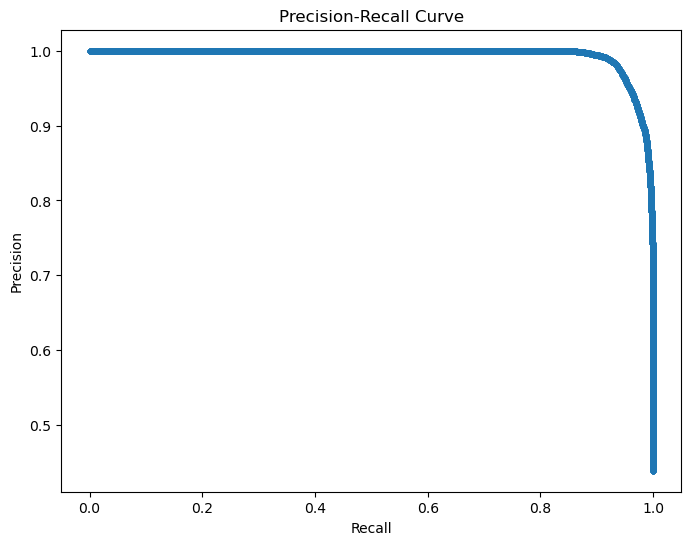

In [38]:
def plot_precision_recall_curve(y_test, y_pred_proba):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
plot_precision_recall_curve(y, model.predict_proba(X)[:, 1])

Accuracy: 0.962113312478276
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14528
           1       0.97      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



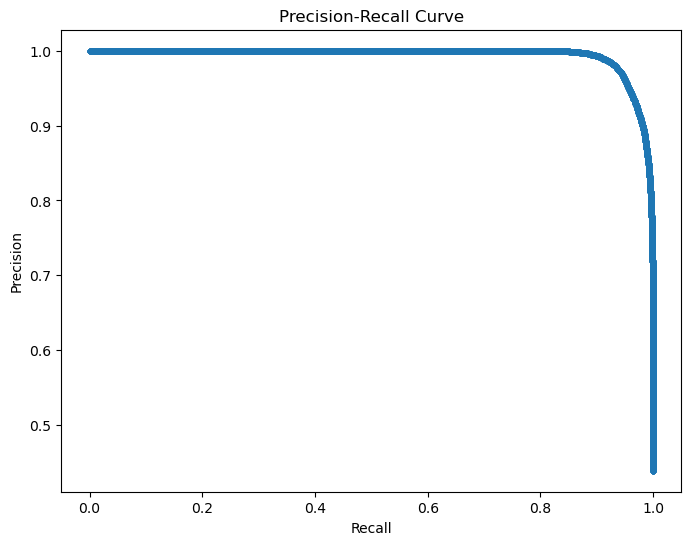

In [ ]:
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PowerTransformer
from itertools import combinations
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve

class AirlineSatisfactionPreprocessor:
    def __init__(self):
        self.encoding_dict = {}
        self.label_encoders = {}
        self.onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
        self.power_transformer = PowerTransformer(method="yeo-johnson")
        
    def preprocess(self, df):
        # Drop unnecessary columns
        df = df.dropna()
        df = df.drop(columns=['Unnamed: 0', 'id'], errors='ignore')
        
        # Define column types
        cat_cols = ['Type of Travel', 'Customer Type', 'Class', 'satisfaction']
        oh_col = ['Gender']
        
        # Label Encoding
        for col in cat_cols:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            self.label_encoders[col] = le
            self.encoding_dict[col] = dict(zip(le.classes_, range(len(le.classes_))))
        
        # One-Hot Encoding
        encoded_data = self.onehot_encoder.fit_transform(df[oh_col])
        encoded_df = pd.DataFrame(
            encoded_data, 
            columns=self.onehot_encoder.get_feature_names_out(oh_col)
        )

        # Combine dataframes
        df = df.drop(columns=oh_col).reset_index(drop=True)
        df = pd.concat([df, encoded_df], axis=1)
        
        return df
    
    def transform_skewed_features(self, df):
        numerical_cols = df.select_dtypes(include=[np.number]).columns
        skewed_cols = df[numerical_cols].apply(lambda x: x.skew()).abs()
        skewed_cols = skewed_cols[skewed_cols > 0.5].index
        
        # Apply Yeo-Johnson transformation
        df[skewed_cols] = self.power_transformer.fit_transform(df[skewed_cols])
        
        return df
    
    def age_group_transformation(self, df):
        bins = [7, 18, 30, 40, 50, 60, 70, 80, 85]
        labels = ['7-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-85']
        df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
        df = df.drop(columns=['Age'])
        df = pd.get_dummies(df, columns=['age_group'], prefix='age')
        
        return df
    
    def feature_interaction(self, df):
        columns = ['Online boarding', 'Inflight wifi service', 'Inflight service', 'Type of Travel']
        new_columns = []
        
        for feature1, feature2 in combinations(columns, 2):
            if feature1 != 'satisfaction' and feature2 != 'satisfaction':
                interaction_feature_name = f"{feature1}_x_{feature2}"
                new_column = (df[feature1] + df[feature2])
                new_columns.append(pd.Series(new_column, name=interaction_feature_name))
        
        df = pd.concat([df] + new_columns, axis=1)
        return df
    
    def full_pipeline(self, df):
        df = self.preprocess(df)
        df = self.age_group_transformation(df)
        df = self.transform_skewed_features(df)
        df = self.feature_interaction(df)
        
        return df

class ModelEvaluator:
    @staticmethod
    def evaluate_model(model, X, y):
        y_pred = model.predict(X)
        print("Accuracy:", accuracy_score(y, y_pred))
        print(classification_report(y, y_pred))
    
    @staticmethod
    def plot_precision_recall_curve(y_test, y_pred_proba):
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        
        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision, marker='.')
        plt.title('Precision-Recall Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.show()

def main():
    test_df = pd.read_csv('data/test.csv')
    preprocessor = AirlineSatisfactionPreprocessor()
    
    # Preprocess data
    processed_df = preprocessor.full_pipeline(test_df)
    
    # Split features and target
    X = processed_df.drop(columns=['satisfaction'])
    y = processed_df['satisfaction']

    # Model Import
    model = joblib.load('models/cat_model.pkl')
    ModelEvaluator.evaluate_model(model, X, y)
    ModelEvaluator.plot_precision_recall_curve(y, model.predict_proba(X)[:, 1])

if __name__ == "__main__":
    main()

In [ ]:
import subprocess
subprocess.call(['conda', 'env', 'export', '>', 'conda_environment.yml'], shell=True)
print("Conda environment exported successfully!")

Conda environment exported successfully!


## Conclusion
The analysis provides insights into factors affecting passenger satisfaction and demonstrates the effectiveness of tree-based machine learning models in predicting satisfaction levels.


## Key Findings

### 1. Most Influential Features
- **Inflight wifi service**: Highest overall impact
- **Type of Travel**: Significant variability in satisfaction
- **Customer Type**: Strong influence on rating

### 2. Impact Dynamics
- **Positive Influences**:
  - Class
  - Online boarding
  - Inflight entertainment

- **Negative Influences**:
  - Arrival Delay (consistently reduces satisfaction)
  - Inconsistent wifi service

### 3. Moderate Impact Features
- Baggage handling
- Seat comfort
- Checkin service
- Leg room service

### 4. Less Critical Features
- Gate location
- Cleanliness


## Interaction Effects
- Wifi service importance varies by:
  - Type of Travel
  - Inflight service quality

## Recommendations

1. **Prioritize Wifi Quality**
   - Consistent, high-speed internet
   - Uniform service across different travel types

2. **Minimize Arrival Delays**
   - Improve scheduling
   - Enhance operational efficiency

3. **Personalized Customer Experience**
   - Tailor services to different customer types
   - Segment-specific satisfaction strategies

4. **Continuous Improvement**
   - Monitor and enhance secondary features
   - Holistic approach to service quality

*Insights derived from SHAP value analysis of customer satisfaction ratings*

## Technologies Used
- Python
- Pandas
- NumPy
- Scikit-learn
- XGBoost
- LightGBM
- CatBoost
- Seaborn
- Matplotlib